<a href="https://colab.research.google.com/github/Ally-Tess/Ally-Tess/blob/main/customer_retention_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description of the Business problem:**
Telco is a provider of telecommunication services. Like many enterprises, Telco is finding mechanisms to prevent customer churn. For a telecommunication service provider like Telco, the cost of acquiring a new customer is a lot greater than that of retaining a current customer. Thus the importance of developing an effective customer retention program to maintain the existing clientele.
The first task is to build a classification model to predict whether a customer will cancel the service or not. The second task is to analyze the most important factors that lead to customer churn. Last, provide suggestions to prevent churn.

**Data available:**
The dataset was last updated on February 23rd, 2018. In this data set, each row represents a customer and each column represents attributes about the customer. The attributes include four big categories:

Customers who left within the last month – the column is called **Churn** (target variable)

* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [ ]:
import pandas as pd
df = pd.read_csv('https://www.dropbox.com/s/syvqyqzcmqw7r3w/telecom.csv?raw=1')
df.shape

(3087, 15)

In [ ]:
df[df['Churn'].isnull()].shape

(4, 15)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(3083, 15)

In [ ]:
df.shape

(3083, 15)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,0,0,0,3,1,0,No,Month-to-month,0,Mailed check,19.85,63.75,1.0
1,2,Female,0,0,0,68,1,1,Fiber optic,Two year,0,Credit card (automatic),110.25,7279.35,0.0
2,3,Male,0,1,1,25,1,0,Fiber optic,One year,1,Electronic check,90.40,2178.60,1.0
3,4,Male,0,1,0,24,1,1,DSL,One year,1,Electronic check,58.35,1346.90,0.0
4,5,Female,1,0,0,49,1,1,Fiber optic,Month-to-month,0,Credit card (automatic),101.55,5070.40,0.0


In [ ]:
# How many Male customers with a Two year contract have churned?

df[(df['gender'] == 'Male') & (df['Contract'] == 'Two year') & (df['Churn'] == 1)]
#11 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
661,664,Male,0,1,0,54,1,0,Fiber optic,Two year,0,Bank transfer (automatic),109.75,6110.20,1.0
758,761,Male,0,0,0,71,1,1,Fiber optic,Two year,1,Electronic check,108.05,7532.15,1.0
1042,1045,Male,0,1,0,56,1,1,No,Two year,1,Credit card (automatic),25.15,1327.15,1.0
1168,1171,Male,0,1,0,61,1,1,Fiber optic,Two year,1,Electronic check,94.10,5638.30,1.0
1260,1263,Male,1,1,0,69,1,1,Fiber optic,Two year,1,Bank transfer (automatic),108.40,7318.20,1.0
1608,1611,Male,0,1,1,67,1,1,DSL,Two year,1,Electronic check,79.70,5293.40,1.0
1615,1618,Male,0,1,0,68,1,1,Fiber optic,Two year,1,Bank transfer (automatic),110.00,7611.85,1.0
1968,1971,Male,0,0,0,69,1,1,Fiber optic,Two year,1,Bank transfer (automatic),106.50,7348.80,1.0
2322,2325,Male,0,1,1,52,1,1,Fiber optic,Two year,1,Bank transfer (automatic),96.25,4990.25,1.0
2925,2929,Male,0,1,1,65,1,1,Fiber optic,Two year,0,Bank transfer (automatic),108.65,6937.95,1.0


In [ ]:
#19. What is the ratio of average of Total Charges for Male Senior Citizens to that of Female Senior citizens?

In [ ]:
df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1)]['TotalCharges'].mean()

2680.1518672199177

In [ ]:
df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 1)]['TotalCharges'].mean()

2582.106882591094

In [ ]:
df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1)]['TotalCharges'].mean()/df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 1)]['TotalCharges'].mean()

1.0379709241665618

In [ ]:
# Exploratory Data Analysis

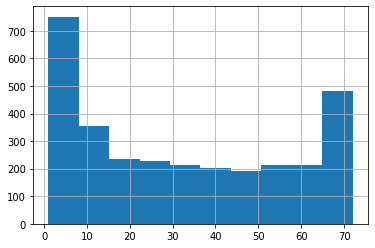

In [ ]:
# Plot the variable tenure? How is the data distributed?
df['tenure'].hist()

In [ ]:
# How many customers have churned?
df['Churn'].value_counts()

0.0    2253
1.0     830
Name: Churn, dtype: int64

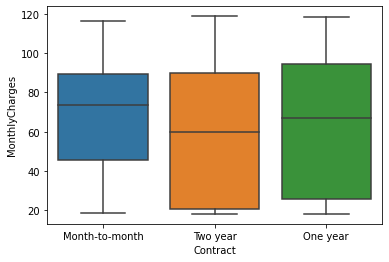

In [ ]:
#Does the Monthly charges vary across different Contract types? What interesting insights do you see?

import seaborn as sns
sns.boxplot(x = 'Contract', y = 'MonthlyCharges', data = df)

# Preparing the data for Predictive Modeling

In [ ]:
df = pd.get_dummies(df, columns = ['gender', 'InternetService', 'Contract', 'PaymentMethod'], drop_first = True)
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,3,1,0,0,19.85,63.75,1.0,0,0,1,0,0,0,0,1
1,2,0,0,0,68,1,1,0,110.25,7279.35,0.0,0,1,0,0,1,1,0,0
2,3,0,1,1,25,1,0,1,90.40,2178.60,1.0,1,1,0,1,0,0,1,0
3,4,0,1,0,24,1,1,1,58.35,1346.90,0.0,1,0,0,1,0,0,1,0
4,5,1,0,0,49,1,1,0,101.55,5070.40,0.0,0,1,0,0,0,1,0,0


In [ ]:
df.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
predictors = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'gender_Male', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
outcome = 'Churn'

In [ ]:
#25
df['Churn'] = df['Churn'].astype('category')
df.dtypes

customerID                                  int64
SeniorCitizen                               int64
Partner                                     int64
Dependents                                  int64
tenure                                      int64
PhoneService                                int64
MultipleLines                               int64
PaperlessBilling                            int64
MonthlyCharges                            float64
TotalCharges                              float64
Churn                                    category
gender_Male                                 uint8
InternetService_Fiber optic                 uint8
InternetService_No                          uint8
Contract_One year                           uint8
Contract_Two year                           uint8
PaymentMethod_Credit card (automatic)       uint8
PaymentMethod_Electronic check              uint8
PaymentMethod_Mailed check                  uint8
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data for modeling into train and test
X = df[predictors]
y = df[outcome]

trainx, validx, trainy, validy = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Build decision tree
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(trainx,trainy)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
import matplotlib.pylab as plt
from sklearn import tree
fig = plt.figure(figsize=(400,200)) #change fig size
tree.plot_tree(dt, feature_names = X.columns, class_names = ['0','1'], filled = True) #specify feature_names and class_names [assumes binary output 0 or 1]
plt.show()

In [ ]:
# a. Identify important variables.
importances = dt.feature_importances_
print(pd.DataFrame({'feature': trainx.columns, 'importance': importances}).sort_values('importance', ascending = False))

                                  feature  importance
3                                  tenure    0.495976
10            InternetService_Fiber optic    0.366139
11                     InternetService_No    0.028191
13                      Contract_Two year    0.026951
7                          MonthlyCharges    0.024919
15         PaymentMethod_Electronic check    0.019632
8                            TotalCharges    0.016469
5                           MultipleLines    0.014037
0                           SeniorCitizen    0.007685
9                             gender_Male    0.000000
1                                 Partner    0.000000
6                        PaperlessBilling    0.000000
12                      Contract_One year    0.000000
4                            PhoneService    0.000000
14  PaymentMethod_Credit card (automatic)    0.000000
2                              Dependents    0.000000
16             PaymentMethod_Mailed check    0.000000


In [ ]:
#28

from sklearn.metrics import recall_score, precision_score

print("precision score: ", precision_score(validy,dt.predict(validx)))
print("recall score: ", recall_score(validy,dt.predict(validx)))

precision score:  0.6008403361344538
recall score:  0.5909090909090909
